# DSC 275/475: Time Series Analysis and Forecasting (Fall 2022)

 # Project-1 <br>
(Total points: 60 for undergraduate students; 70 for Graduate students and including extra credit for undergraduate students)

# Aradhya Mathur

Overview
This project is designed to provide you hands-on experience working on an end-to-end time series
analysis and forecasting solution using AR/ARMA/ARIMA/SARIMA modeling. You are welcome to
use any external libraries/packages for this project. A few recommendations are provided for each
problem below.
This is a guided exercise in that you are expected to answer each of the questions below. For
some of the questions, you will appreciate there is no single correct answer. In such cases, you have
flexibility to decide the approach. Any conclusions you make or decisions you take must be stated
and accompanied by a reasonable justification.
Your submission should be a PDF document with responses (including figures/plots) to each
question along with the code either included inline [e.g. Notebook] or as a separate file.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as tsa
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Question 1

Problem:1 (60 pts; Required for all students)
The data for this project (Problem1_DataSet.csv) represents 7 years of monthly data on airline
miles flown in the United Kingdom. You are tasked with the goal of developing a forecasting model
that can accurately predict the trend for future years. To achieve the final goal, answer each of
the questions below

1. Create a time series of the plot of the data provided. (5 pts)



In [31]:
# Reading dataset
dfp1 = pd.read_csv('Problem1_DataSet.csv',header = 0)
dfp1.head()

,Month,"Miles, in Millions"
0,Jan-1964,7.269
1,Feb-1964,6.775
2,Mar-1964,7.819
3,Apr-1964,8.371
4,May-1964,9.069


In [32]:
#Changing Month format
dfp1['Month'] = pd.to_datetime(dfp1['Month'])
dfp1.head()

,Month,"Miles, in Millions"
0,1964-01-01,7.269
1,1964-02-01,6.775
2,1964-03-01,7.819
3,1964-04-01,8.371
4,1964-05-01,9.069


In [33]:
#Renaming Column 
dfp1.columns = ['Month','Miles']
dfp1.head()

,Month,Miles
0,1964-01-01,7.269
1,1964-02-01,6.775
2,1964-03-01,7.819
3,1964-04-01,8.371
4,1964-05-01,9.069


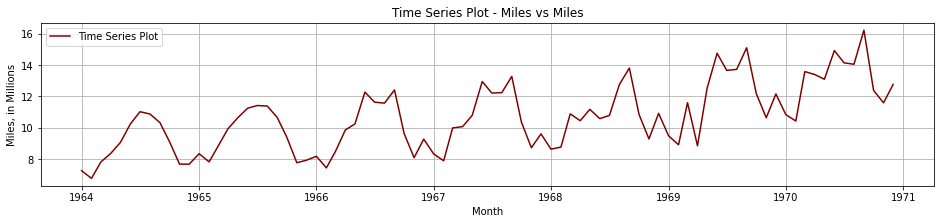

In [34]:
#Time Series Plot
plt.figure(figsize=(16, 3))
plt.plot(dfp1['Month'],dfp1['Miles'] , label = 'Time Series Plot' , color = 'maroon')
plt.xlabel ('Month')
plt.grid()
plt.ylabel ('Miles, in Millions')
plt.legend()
plt.title('Time Series Plot - Miles vs Miles')
plt.show()

2. Plot the autocorrelation function (ACF). From the ACF, what is the seasonal period?
(5 pts)


<Figure size 1152x216 with 0 Axes>

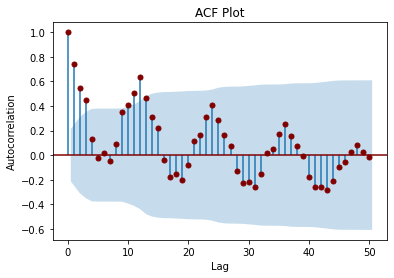

In [35]:
# ACF Plot
plt.figure(figsize=(16, 3))
tsa.plot_acf(dfp1['Miles'], lags = 50, color = 'maroon')
plt.xlabel('Lag')

plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()

Seasonal Period is 12 lags (0-11 first period)

3. Compute a moving average for the data to determine the trend in the data and overlay on the
original time-series plot. What is a suitable choice for the moving average window length? (5
pts)

In [36]:
#Simple Moving Average
dfp1['Sma_p1'] = dfp1['Miles'].rolling(12, min_periods=12).mean()
dfp1.head()

,Month,Miles,Sma_p1
0,1964-01-01,7.269,NaN
1,1964-02-01,6.775,NaN
2,1964-03-01,7.819,NaN
3,1964-04-01,8.371,NaN
4,1964-05-01,9.069,NaN


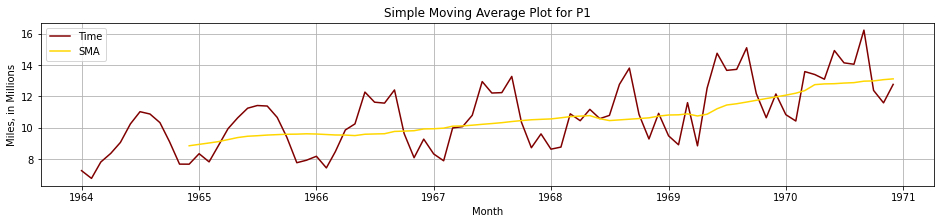

In [37]:
#Overlaying Time Series Plot
plt.figure(figsize=(16, 3))
monthp1 = dfp1['Month']
plt.grid()
milesp1 = dfp1['Miles'] 
smap1 = dfp1['Sma_p1']
plt.plot(monthp1,milesp1 , label = 'Time', color = 'maroon')
plt.plot(monthp1,smap1 , label = 'SMA', color = 'gold')
plt.title('Simple Moving Average Plot for P1')
plt.xlabel('Month')
plt.legend()
plt.ylabel('Miles, in Millions')
plt.show()

Window length should be 12 (as seasonal period is 12)

4. Observing the moving average plot in Q3, is the trend line increasing or decreasing? (5 pts)

Answer) It is quite evident from the above plot that trend line is increasing.

5. Compute the first difference of the data and plot the ACF and PACF for the differenced data.
What are the significant lags based on the ACF and PACF? (5 pts)



In [38]:
#Finding first difference
firstdif_p1 = diff(milesp1)
print(firstdif_p1)

1    -0.494
2     1.044
3     0.552
4     0.698
5     1.179
      ...  
79   -0.090
80    2.177
81   -3.845
82   -0.795
83    1.178
Name: Miles, Length: 83, dtype: float64


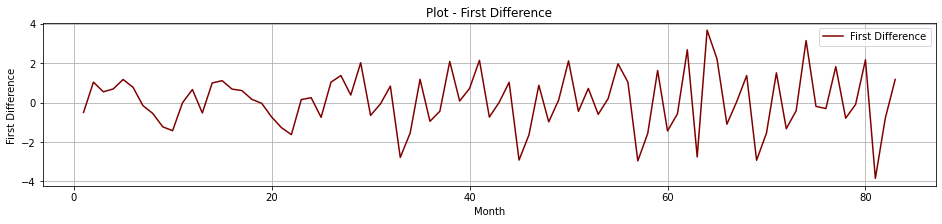

In [39]:
#Ploting first difference
plt.figure(figsize=(16, 3))
firstdif_p1.plot(label = 'First Difference', color = 'maroon')
plt.grid()
plt.xlabel('Month')
plt.ylabel('First Difference ')
plt.legend()
plt.title('Plot - First Difference')
plt.show()

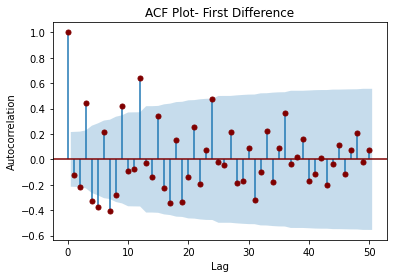

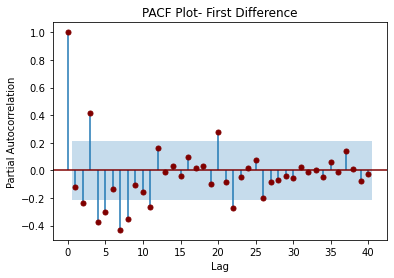

In [40]:
#ACF of first difference
tsa.plot_acf(firstdif_p1, lags = 50, color = 'maroon')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot- First Difference')
plt.show()

#PACF of first difference
tsa.plot_pacf(firstdif_p1, lags=40, method = 'ywmle', color = 'maroon') # Not possible for lag = 50
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation') 
plt.title('PACF Plot- First Difference')
plt.show()

Significant lags based based on ACF and PACF are: <br>
    ACF:  2, 3, 4, 5, 7, 9 and 12 (24 is just on line) <br>
    PACF:  2, 3, 4, 5, 7, 8, 11, 20, and 22 (26 is just on line)

6. Using the output from Q5 above, perform a first seasonal difference with the seasonal period
you identified in Q2, and plot the ACF and PACF again. What are the significant lags based
on the ACF and PACF? (5 pts)

In [41]:
#First Seasonal Difference
#Seasonal Period = 12 as identified in Q2
seasonaldif_p1 = diff(firstdif_p1, k_diff=0, k_seasonal_diff=1, seasonal_periods=12)
seasonaldif_p1

13   -0.027
14   -0.044
15    0.567
16   -0.008
17   -0.564
      ...  
79   -0.154
80    0.798
81   -0.920
82    0.745
83   -0.338
Name: Miles, Length: 71, dtype: float64

In [42]:
#Checking if on original data, we apply k_diff = 1 which is what we did in question 5
seasonaldif_p2 = diff(milesp1, k_diff=1, k_seasonal_diff=1, seasonal_periods=12)
seasonaldif_p2
#Output is same

13   -0.027
14   -0.044
15    0.567
16   -0.008
17   -0.564
      ...  
79   -0.154
80    0.798
81   -0.920
82    0.745
83   -0.338
Name: Miles, Length: 71, dtype: float64

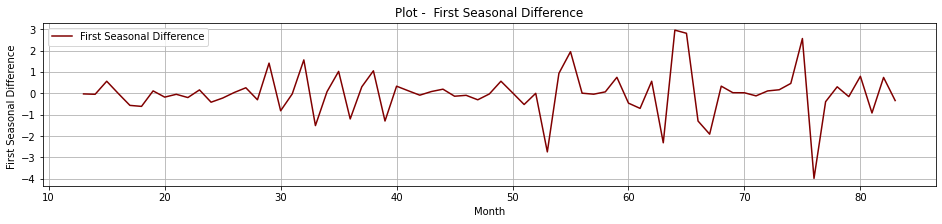

In [43]:
#Ploting first difference
plt.figure(figsize=(16,3))
seasonaldif_p1.plot(label = 'First Seasonal Difference', color = 'maroon')
plt.grid()
plt.xlabel('Month')
plt.ylabel('First Seasonal Difference ')
plt.legend()
plt.title('Plot -  First Seasonal Difference')
plt.show()

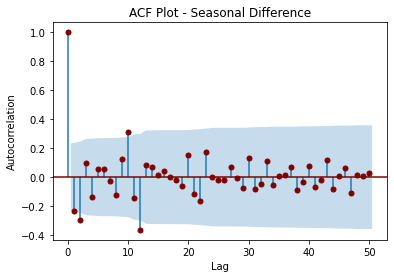

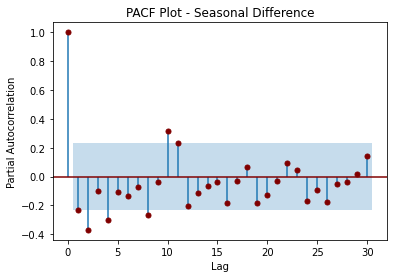

In [44]:
#ACF Plot
tsa.plot_acf(seasonaldif_p1, lags = 50, color = 'maroon')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot - Seasonal Difference')
plt.show()

#PACF Plot
tsa.plot_pacf(seasonaldif_p1, lags=30, method = 'ywmle', color = 'maroon')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation') 
plt.title('PACF Plot - Seasonal Difference')
plt.show()

Significant lags based based on ACF and PACF are: <br>
ACF: 1, 2, 10, and 12 <br>
PACF: 1, 2, 4, 8, 10, and 11

7. Develop a suitable SARIMA model that can be applied on the time series. Use the first 6 years
of data only to develop the model. (20 pts)

Suggestions for Problem 1, Q7:
• For Q7, in Python, we suggest using the package/function SARIMAX in the
“statsmodels.tsa.statespace” library <br>
• You can choose the range of values to search for the model parameters. We
suggest varying p, q and P, Q each over the range 0 to 3 to constrain the search
range. <br>
• The SARIMA estimation procedure internally uses numerical optimization
procedures to find a set of coefficients for the model. These procedures can fail for
some combination of model parameter values which in turn can throw Python
errors. We must catch these exceptions and skip those configurations that cause a
problem. To solve this problem, include “try/except” blocks in your code when
iterating through the parameter values (pseudocode below): <br>
try:<br>
##Your code here with the SARIMAX function <br>
except: <br>
continue <br>


a. To develop the model, vary the model parameters for the non-seasonal (p,d,q) and
seasonal components (P,D,Q) and calculate the output for each combination of
parameters.


In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
#Using first 6 years of data
df_6year = dfp1['Miles'].iloc[0:72] # 6 years = 72 Months
df_6year

0      7.269
1      6.775
2      7.819
3      8.371
4      9.069
       ...  
67    13.731
68    15.110
69    12.185
70    10.645
71    12.161
Name: Miles, Length: 72, dtype: float64

In [47]:
from itertools import product

In [97]:
#Building Model and Datafram
df_sarima_model = pd.DataFrame()
min_aic = []
for [p,d,q,P,D,Q] in product([0,1,2,3],[0,1],[0,1,2,3],[0,1,2,3],[0,1],[0,1,2,3]):
    try:
        m = SARIMAX(df_6year, trend='c', order = (p,d,q), seasonal_order = (P,D,Q,12)) # Sarima Model
        model= m.fit() # Fitting
        AIC = model.aic # AIC calculation
        if AIC is not None: #Finding minimum AIC
            min_aic.append(AIC)
            min_aic.sort()   
            df_sarima_model = df_sarima_model.append({'p': p , 'd': d , 'q': q , 'P': P , 'D': D , 'Q': Q , 'AIC': AIC}, ignore_index=True)
    except:
        continue
#Finding Minimum AIC 
print("Minimum AIC is =", min_aic[0])

Minimum AIC is = 22.0


In [103]:
df_sarima_model.head()

,p,d,q,P,D,Q,AIC
0,0.0,0.0,0.0,0.0,0.0,0.0,300.658861
1,0.0,0.0,0.0,0.0,0.0,1.0,272.463181
2,0.0,0.0,0.0,0.0,0.0,2.0,256.994615
3,0.0,0.0,0.0,0.0,0.0,3.0,248.434514
4,0.0,0.0,0.0,0.0,1.0,0.0,164.079606


In [104]:
df_sarima_model.sort_values(by=['AIC']).head()

,p,d,q,P,D,Q,AIC
847,3.0,0.0,2.0,1.0,1.0,3.0,22.000000
613,2.0,0.0,3.0,0.0,1.0,1.0,146.075045
44,0.0,0.0,1.0,1.0,1.0,0.0,146.584422
620,2.0,0.0,3.0,1.0,1.0,0.0,146.823471
37,0.0,0.0,1.0,0.0,1.0,1.0,146.837023


Non Seasonal:  p= 3 , d= 0 , q= 2 <br>
Seasonal:  P=  1 , D= 1 , Q= 3 <br>
AIC for the above parameter is = 22.0 <br>
This is very odd, so taking the next best AIC

In [102]:
#Finding the next best AIC
min_aic[1]

146.07504549157454

Non Seasonal:  p= 2 , d= 0 , q= 3 <br>
Seasonal:  P=  0 , D= 1 , Q= 1 <br>
AIC for the above parameter is = 146.07505

b. Use an evaluation criteria such as AIC, BIC or sum squared error or mean squared
error to determine the best choice of parameters (p,d,q,P,D,Q). Note: AIC and BIC
are metrics that is readily output by the ARIMA model. 

Using AIC Criteria, best choice of parameters are : <br> 
AIC of that parameter is  <br>
This AIC is the lowest among all parameters (Lower the better).

8. Use the model parameters determined in Q7 above to forecast for the 7th year. Compare the
forecast with actual values. Comment on your observations. (10 pts)

In [105]:
#Forecasting
for_7 = SARIMAX(df_6year, order = (2,0,3), seasonal_order = (0,1,1,12))
for_7_fit = for_7.fit() #Fitting
for_7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Miles   No. Observations:                   72
Model:             SARIMAX(2, 0, 3)x(0, 1, [1], 12)   Log Likelihood                 -71.096
Date:                              Mon, 31 Oct 2022   AIC                            156.192
Time:                                      21:07:46   BIC                            170.853
Sample:                                           0   HQIC                           161.927
                                               - 72                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7191      1.592      0.452      0.651      -2.400       3.838
ar.L2          0.2724      1.589      0.171      0.864      -2.842       3.387
ma.L1         -0.2107      1.621     -0.130      0.897      -3.389       2.967
ma.L2         -0.5824      0.700     -0.832      0.405      -1.954       0.790
ma.L3          0.0149      0.703      0.021      0.983      -1.362       1.392
ma.S.L12      -0.3607      0.168     -2.150      0.032      -0.690      -0.032
sigma2         0.5947      0.091      6.509      0.000       0.416       0.774
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                41.44
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               5.32   Skew:                            -0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
# Forecast for the 7th year using the best model we got from Q7.
for_7_predict = for_7_fit.get_forecast(12) 
for_7_predict

In [107]:
#Actual values for 7th year
actual7 = dfp1.iloc[72:84].drop(columns='Sma_p1')
actual7

,Month,Miles
72,1970-01-01,10.840
73,1970-02-01,10.436
74,1970-03-01,13.589
75,1970-04-01,13.402
76,1970-05-01,13.103
77,1970-06-01,14.933
78,1970-07-01,14.147
79,1970-08-01,14.057
80,1970-09-01,16.234
81,1970-10-01,12.389


In [108]:
#Finding MAE between actual and predicted value
mae = mean_absolute_error(actual7.Miles, for_7_predict.predicted_mean) 
mae

0.5427992132747512

In [109]:
mse = mean_squared_error(actual7.Miles, for_7_predict.predicted_mean) 
mse

0.791953685081479

In [110]:
sse = np.sum((for_7_predict.predicted_mean - actual7.Miles)**2)
print(sse)

9.503444220977748


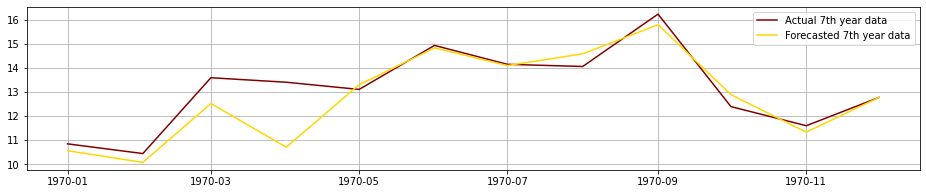

In [111]:
#Plot between actual and predicted value
plt.figure(figsize=(16, 3))
plt.grid()
plt.plot(actual7.Month,actual7.Miles, label='Actual 7th year data', color = 'maroon')
plt.plot(actual7.Month,for_7_predict.predicted_mean, label='Forecasted 7th year data', color = 'gold')
plt.legend()

Mean Absolute Error is 0.5427992132747512, Mean Squared Error is 0.791953685081479 and Sum Squared Error is 9.503444220977748 <br>
Lower the error better and more accurate is the forecast. MAE and MSE values are very low so the forecasting model is highly accurate. <br>
Also from the graph it is evident that Actual and forecasted data are quite close and follow same trend except for the region (1970-03 to 1970-05)

# Question 2

Problem 2 (10 pts): (Required for Graduate students; Extra credit opportunity for Undergraduate students) <br>
In this problem, you will develop a time-series model to analyze Wine consumption from the data file “TotalWine.csv”. 

a) Plot the time series for TotalWine. What is the seasonal period for this time-series? (1 pt)



In [112]:
#Reading Database
winedf = pd.read_csv('TotalWine.csv')
winedf.head()

,Time (Quarter),TotalWine
0,1,1.486
1,2,1.915
2,3,1.844
3,4,2.808
4,5,1.287


In [113]:
#Renaming Columns
winedf.columns = ['Time','Wine']

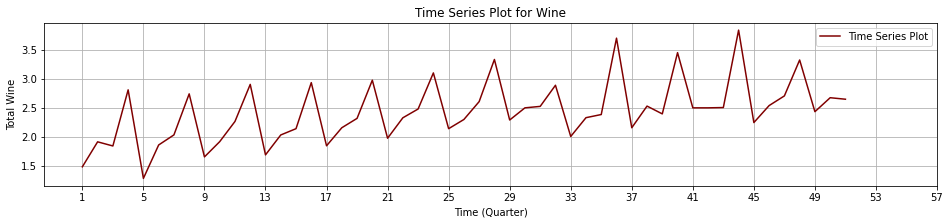

In [114]:
#Time Series Plot for TotalWine
plt.figure(figsize=(16, 3))
plt.plot (winedf['Time'], winedf['Wine'], label = 'Time Series Plot', color = 'maroon')
plt.xlabel ('Time (Quarter)')
plt.legend()
plt.ylabel ('Total Wine')
plt.title('Time Series Plot for Wine')
plt.grid()
plt.xticks(np.arange(1, 60, 4))  # X axis interval of 4 
plt.show()

Seasonal period is, 4 which is a year. (5-1 = 4)

b) Apply seasonal differencing to the original time-series. Vary the difference lag from 1, 2, 4, 6.
Plot the result for each of these lags. Which of these differences is most suitable to remove
the seasonality? (2 pts)



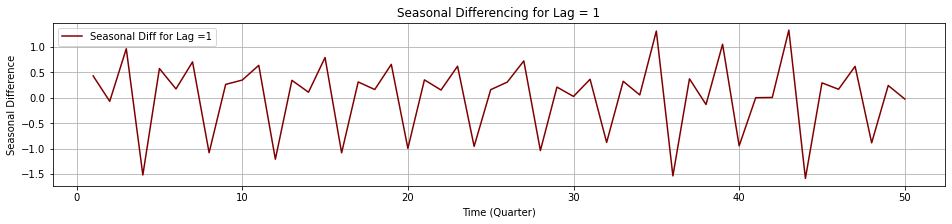

In [115]:
#Seasonal Differencing for lag =1
plt.figure(figsize=(16, 3))
sea_diff_wine1= diff(winedf['Wine'], k_diff=0, k_seasonal_diff=1, seasonal_periods=1)
plt.plot(sea_diff_wine1, label = 'Seasonal Diff for Lag =1', color = 'maroon')
plt.xlabel('Time (Quarter)')
plt.grid()
plt.legend()
plt.ylabel('Seasonal Difference')
plt.title('Seasonal Differencing for Lag = 1')
plt.show()

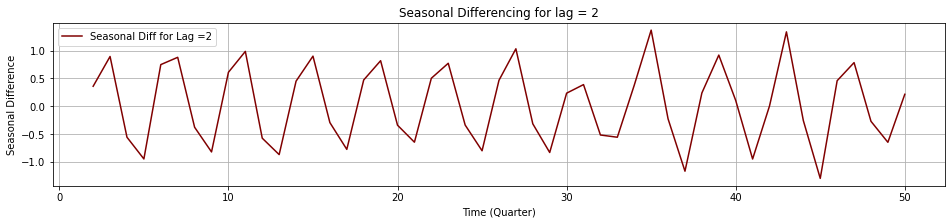

In [116]:
#Seasonal Differencing for lag =2
plt.figure(figsize=(16, 3))
sea_diff_wine2= diff(winedf['Wine'], k_diff=0, k_seasonal_diff=1, seasonal_periods=2)
plt.plot(sea_diff_wine2, label = 'Seasonal Diff for Lag =2', color = 'maroon')
plt.grid()
plt.xlabel('Time (Quarter)')
plt.legend()
plt.ylabel('Seasonal Difference')
plt.title('Seasonal Differencing for lag = 2')
plt.show()

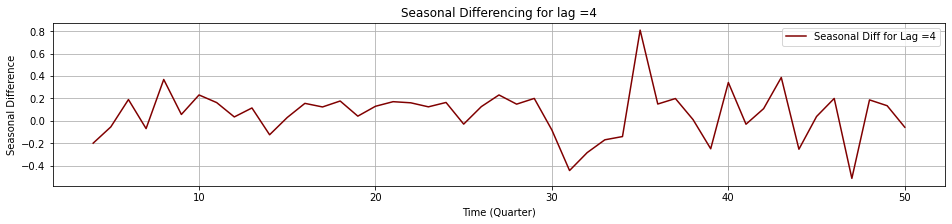

In [117]:
#Seasonal Differencing for lag = 4
plt.figure(figsize=(16, 3))
sea_diff_wine4= diff(winedf['Wine'], k_diff=0, k_seasonal_diff=1, seasonal_periods=4)
plt.plot(sea_diff_wine4, label = 'Seasonal Diff for Lag =4', color = 'maroon')
plt.xlabel('Time (Quarter)')
plt.grid()
plt.legend()
plt.ylabel('Seasonal Difference')
plt.title('Seasonal Differencing for lag =4')
plt.show()

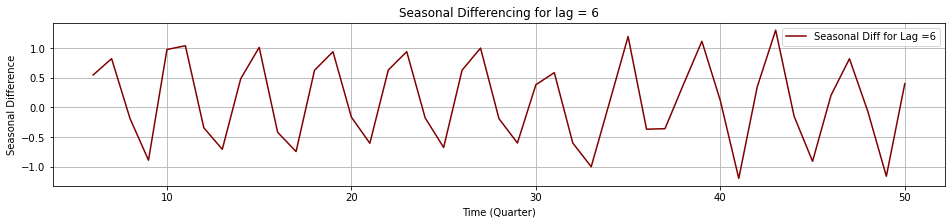

In [118]:
#Seasonal Differencing for lag =1
plt.figure(figsize=(16, 3))
sea_diff_wine6= diff(winedf['Wine'], k_diff=0, k_seasonal_diff=1, seasonal_periods=6)
plt.plot(sea_diff_wine6, label = 'Seasonal Diff for Lag =6', color = 'maroon')
plt.grid()
plt.legend()
plt.xlabel('Time (Quarter)')
plt.ylabel('Seasonal Difference')
plt.title('Seasonal Differencing for lag = 6')
plt.show()

It is quite evident that differencing at lag = 4 is the most suitable. No seasonality can be observed in the plot for lag = 4 while for lag = 1,2,6 some seasonality can be easily observed.  

c) Compute and plot the Auto-correlation (ACF) function for the original time-series. What is the
seasonal period you estimate from the ACF? (1 pt)



In [119]:
#Compute ACF  for the original time-series
acf_wine = acf(winedf['Wine'])
acf_wine

array([ 1.        ,  0.00981336,  0.09418692, -0.02079117,  0.8230856 ,
       -0.01459707,  0.03758512, -0.06608181,  0.68555932, -0.05158531,
       -0.0205    , -0.13186071,  0.55301224, -0.05533192, -0.05098654,
       -0.16658851,  0.43247383, -0.08668489, -0.09922711, -0.18956349,
        0.36057707, -0.12115055, -0.1329952 , -0.23540279,  0.27197506,
       -0.14075334, -0.1481723 , -0.25076684,  0.20724364, -0.14985131,
       -0.14016206, -0.25396157,  0.17482009, -0.1590046 , -0.15594347,
       -0.27055794,  0.08512343, -0.14183386, -0.140666  , -0.21838452,
        0.03854688])

<Figure size 1152x216 with 0 Axes>

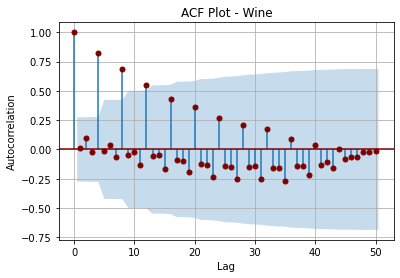

In [120]:
# Plot ACF  for the original time-series
plt.figure(figsize=(16, 3))
tsa.plot_acf(winedf['Wine'], lags = 50, color = 'maroon')
plt.xlabel('Lag')
plt.grid()
plt.ylabel('Autocorrelation')
plt.title('ACF Plot - Wine')
plt.show()

It is evident that Seasonal period = 4 lags.

d) Define an AR model using tsa.AR available in statsmodels.api. Determine the optimal order
using the “select_order” function. You will need to specify a maximum order p (recommend
p=10) to consider and a criterion for deciding which model order is "best". [e.g. You can use
AIC as the model selection criteria] (2 pts)



In [121]:
#Importing
from statsmodels.api import tsa as stat_tsa
#Differencing , Seasonal Period =4
seas_best = diff(winedf['Wine'], k_diff=0, k_seasonal_diff=1, seasonal_periods=4)
#AR Model
ar_wine = stat_tsa.AR(seas_best) 
#Finding optimal order (p=10) , using select_order
optimal = ar_wine.select_order(maxlag=10, ic="aic") 
optimal

5

Optimal order is 5

e) Now, evaluate an AR(p) model for the time-series generated after seasonal differencing (using
the best lag you found in part b above) (4 pts)<br>
i. use the fit method specifying the optimal lag found above<br>


In [122]:
#Fit method for optimal lag = 5
arp_model = stat_tsa.AR(seas_best)
arp_model_fit = arp_model.fit(maxlag = 5)
arp_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      W  -                  i                  n
Model:                          AR(5)   Log Likelihood                  15.069
Method:                          cmle   S.D. of innovations              0.374
Date:                Mon, 31 Oct 2022   AIC                             -1.636
Time:                        21:07:51   BIC                             -1.346
Sample:                             0   HQIC                            -1.530
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0979      0.086      1.133      0.257      -0.072       0.267
L1.Wine        0.0951      0.363      0.262      0.793      -0.616       0.806
L2.Wine        0.0430      0.276      0.156      0.876      -0.497       0.583
L3.Wine        0.0507      0.276      0.184      0.854      -0.490       0.591
L4.Wine       -0.6859      0.300     -2.284      0.022      -1.275      -0.097
L5.Wine        0.1506      0.387      0.389      0.697      -0.608       0.909
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7652           -0.7378j            1.0629           -0.3779
AR.2           -0.7652           +0.7378j            1.0629            0.3779
AR.3            0.8052           -0.8155j            1.1460           -0.1260
AR.4            0.8052           +0.8155j            1.1460            0.1260
AR.5            4.4744           -0.0000j            4.4744           -0.0000
-----------------------------------------------------------------------------
"""

ii. use the predict method to generate values starting at the optimal lag<br>


In [123]:
seas_best[5:].count()

42

In [124]:
seas_best[5:].head()

9     0.057
10    0.231
11    0.163
12    0.035
13    0.115
Name: Wine, dtype: float64

In [125]:
# Using predict method to generate values starting at the optimal lag = 5
predict_arp = arp_model_fit.predict(start = 5)
predict_arp = predict_arp[0:42] #Length = 42
predict_arp.head()

9     0.146767
10   -0.022745
11    0.217014
12   -0.137244
13    0.136466
dtype: float64

iii. plot the predicted results and the corresponding seasonally differenced time-series

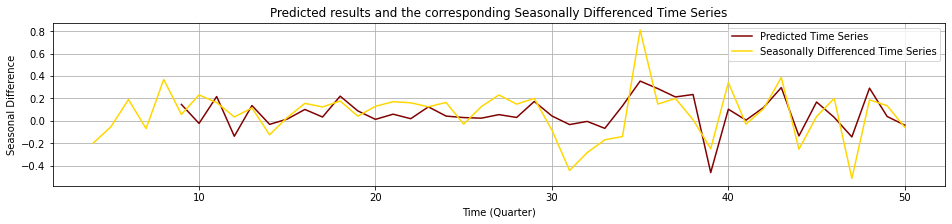

In [126]:
#Plot the Predicted Results and the Corresponding Seasonally Differenced Time Series
plt.figure(figsize=(16, 3))
# Predict values
plt.grid()
plt.plot(predict_arp,label = 'Predicted Time Series', color = 'maroon') 
# Seasonally Differenced Time Series
plt.plot(seas_best, label = 'Seasonally Differenced Time Series', color = 'gold') 
plt.title('Predicted results and the corresponding Seasonally Differenced Time Series')
plt.xlabel('Time (Quarter)')
plt.ylabel('Seasonal Difference')
plt.legend()
plt.show()

iv. Calculate the Mean Absolute Error (MAE) by comparing the predicted results with the seasonally differenced data.

In [127]:
#Finding MAE
maeq2 = mean_absolute_error(seas_best[5:], predict_arp) 
maeq2

0.13139640993766555

Mean Absolute Error is 0.13139640993766555

In [128]:
mseq2 = mean_squared_error(seas_best[5:], predict_arp) 
mseq2

0.028569077607855303

Mean Squared Error is 0.028569077607855303

In [129]:
sseq2 = np.sum((seas_best[5:]-predict_arp)**2)
sseq2

1.1999012595299228

SSE is 1.1999012595299228